<div style="display:fill;
           background-color:#DDDDDD;
           letter-spacing:0.5px;border-bottom: 2px solid black;">
<img src="https://news.harvard.edu/wp-content/uploads/2024/08/smoking-parkinsons.jpg?resize=1680%2C945">
    
<H1 style="padding: 20px; color:black; font-weight:600;font-family: 'Garamond', 'Lucida Sans', sans-serif; text-align: center; font-size: 36px;">🚬 Smoker Status | LGBM + XGB</H1>
</div>


In [35]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import Pool, CatBoostClassifier, cv

<div style="background-color: #DDDDDD; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Table of Contents
    </h1>
</div>

<a href="#1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 1. Dataset Overview </a><br>
<a href="#3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 2. Exploratory Data Analysis & Visualization </a> <br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 3. Training Models </a><br>
<a href="#4.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 16px;padding-left: 25px;"> 3.1 LGBM Model </a><br>
<a href="#4.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 16px;padding-left: 25px;"> 3.2 XGB Model </a><br>
<a href="#6" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 4. Plotting Feature Importance </a><br>
<a href="#7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 5. Creating 'submission.csv' </a><br>


<div id="1" style="background-color: #DDDDDD; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
    Dataset Overview
    </h1>
</div>

In [36]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv",index_col="id")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col="id")

In [37]:
train_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [38]:
test_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
id,,,,,,,,,,,,,,,,,,,,,
159256,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
159257,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
159258,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
159259,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
159260,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1


In [39]:
train_data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


<div id="3" style="background-color: #DDDDDD; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
    Exploratory Data Analysis & Visualization
    </h1>
</div>

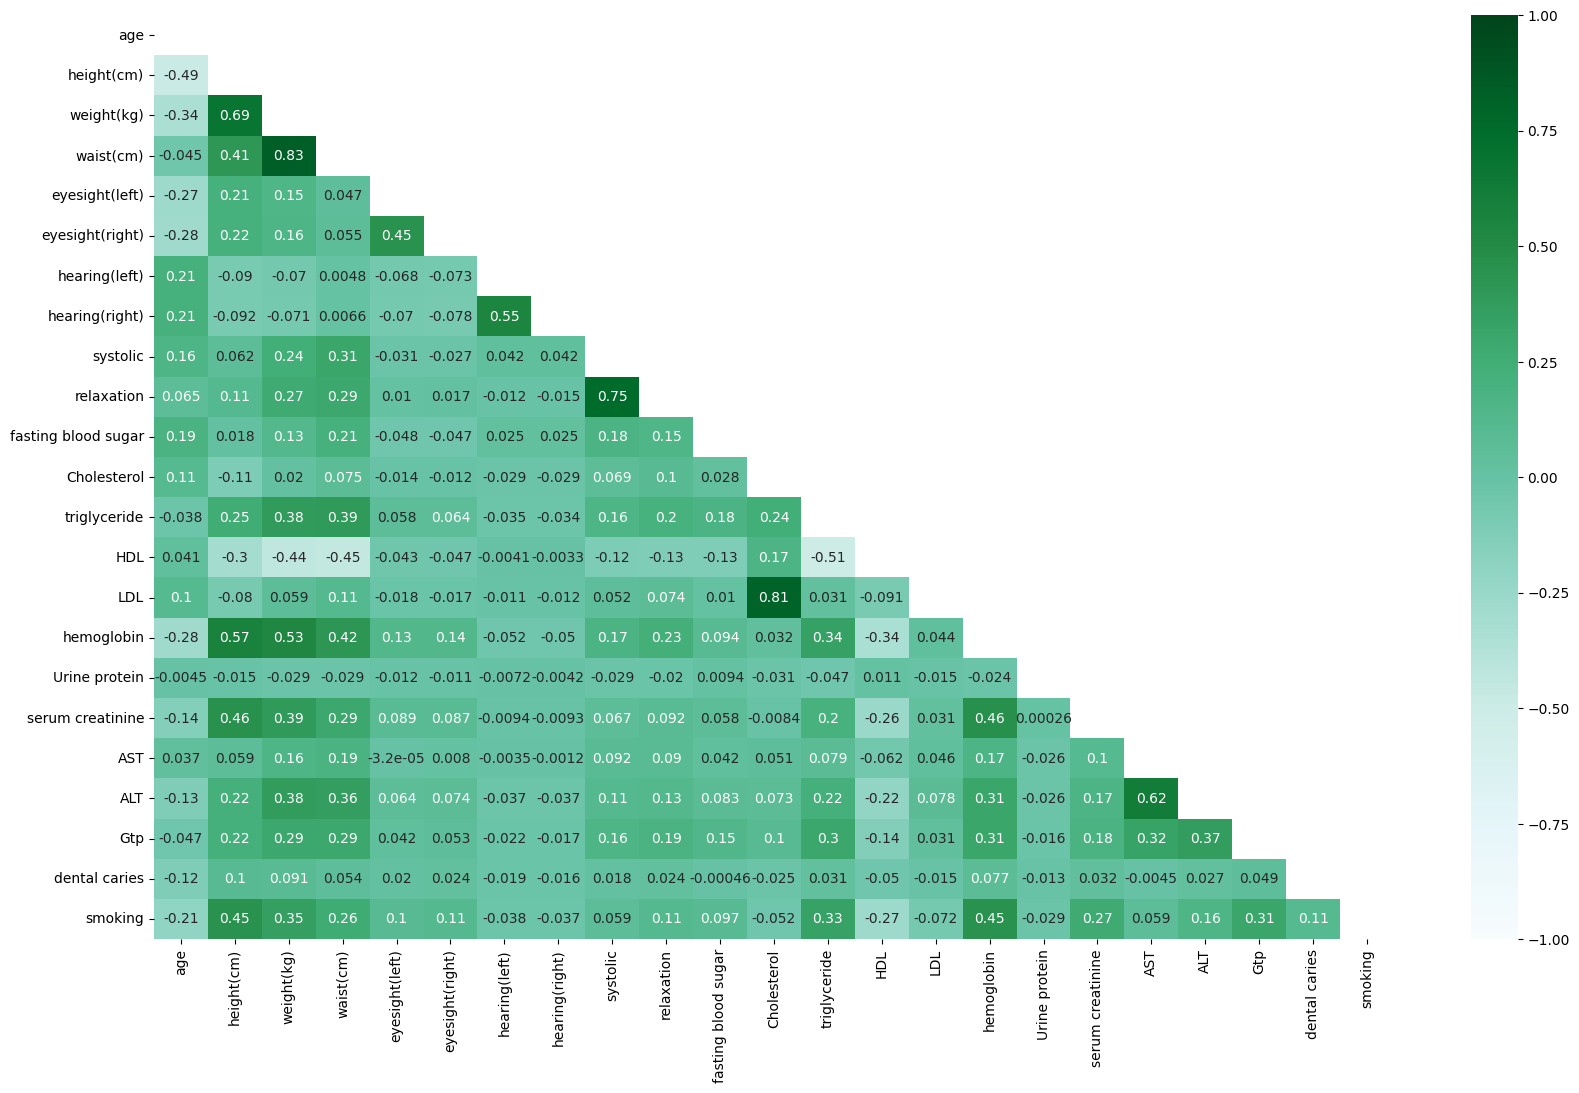

In [40]:
mask = np.triu(np.ones_like(train_data.corr()))
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(), cmap="BuGn", annot=True, mask=mask,vmin=-1,vmax=1);

<div id="4" style="background-color: #DDDDDD; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   Training Models
    </h1>
</div>

In [41]:
seed = np.random.seed(6)

X = train_data.drop(["smoking"],axis=1)
y = train_data["smoking"]

<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   4.1 LGBM Model
    </h1>
</div>
<hr>

In [42]:
lgbmmodel = LGBMClassifier(random_state=seed, device="gpu")
print("CV score of LGBM is ",cross_val_score(lgbmmodel,X,y,cv=4, scoring = 'roc_auc').mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52239, number of negative: 67203
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2131
[LightGBM] [Info] Number of data points in the train set: 119442, number of used features: 22
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 18 dense feature groups (2.28 MB) transferred to GPU in 0.002366 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437359 -> initscore=-0.251889
[LightGBM] [Info] Start training from score -0.251889
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52240, number of negative: 67202
[LightGBM] [Info] This is the GPU train

<div id="4.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   4.2 XGB Model
    </h1>
</div>
<hr>

In [43]:
xgbmodel = XGBClassifier(random_state=seed, tree_method= 'gpu_hist')
print("CV score of XGB is ",cross_val_score(xgbmodel,X,y,cv=4, scoring = 'roc_auc').mean())

CV score of XGB is  0.8647602436772042


In [44]:
%%capture
lgbmmodel.fit(X,y)
xgbmodel.fit(X,y)

<div id="6" style="background-color: #DDDDDD; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   Plotting Feature Importance
    </h1>
</div>

In [45]:
def plotImportance(modelNames,models):
    plt.subplots(len(modelNames),1,figsize=(14,5*len(modelNames)),dpi=300)
    for ind,modelName in enumerate(modelNames):
        history = pd.DataFrame()
        history["cols"] = test_data.columns
        if modelNames[ind] == "CatBoost":
            history["imp"] = models[ind].get_feature_importance()
        else:  
            history["imp"] = models[ind].feature_importances_
        history.sort_values("imp",inplace=True,ascending=False)
        history.reset_index(drop=True)
        plt.subplot(len(modelNames),1,ind+1)
        sns.barplot(x=history["imp"],y=history["cols"],palette="rocket");
        plt.title("Feature Imporance of "+modelName)


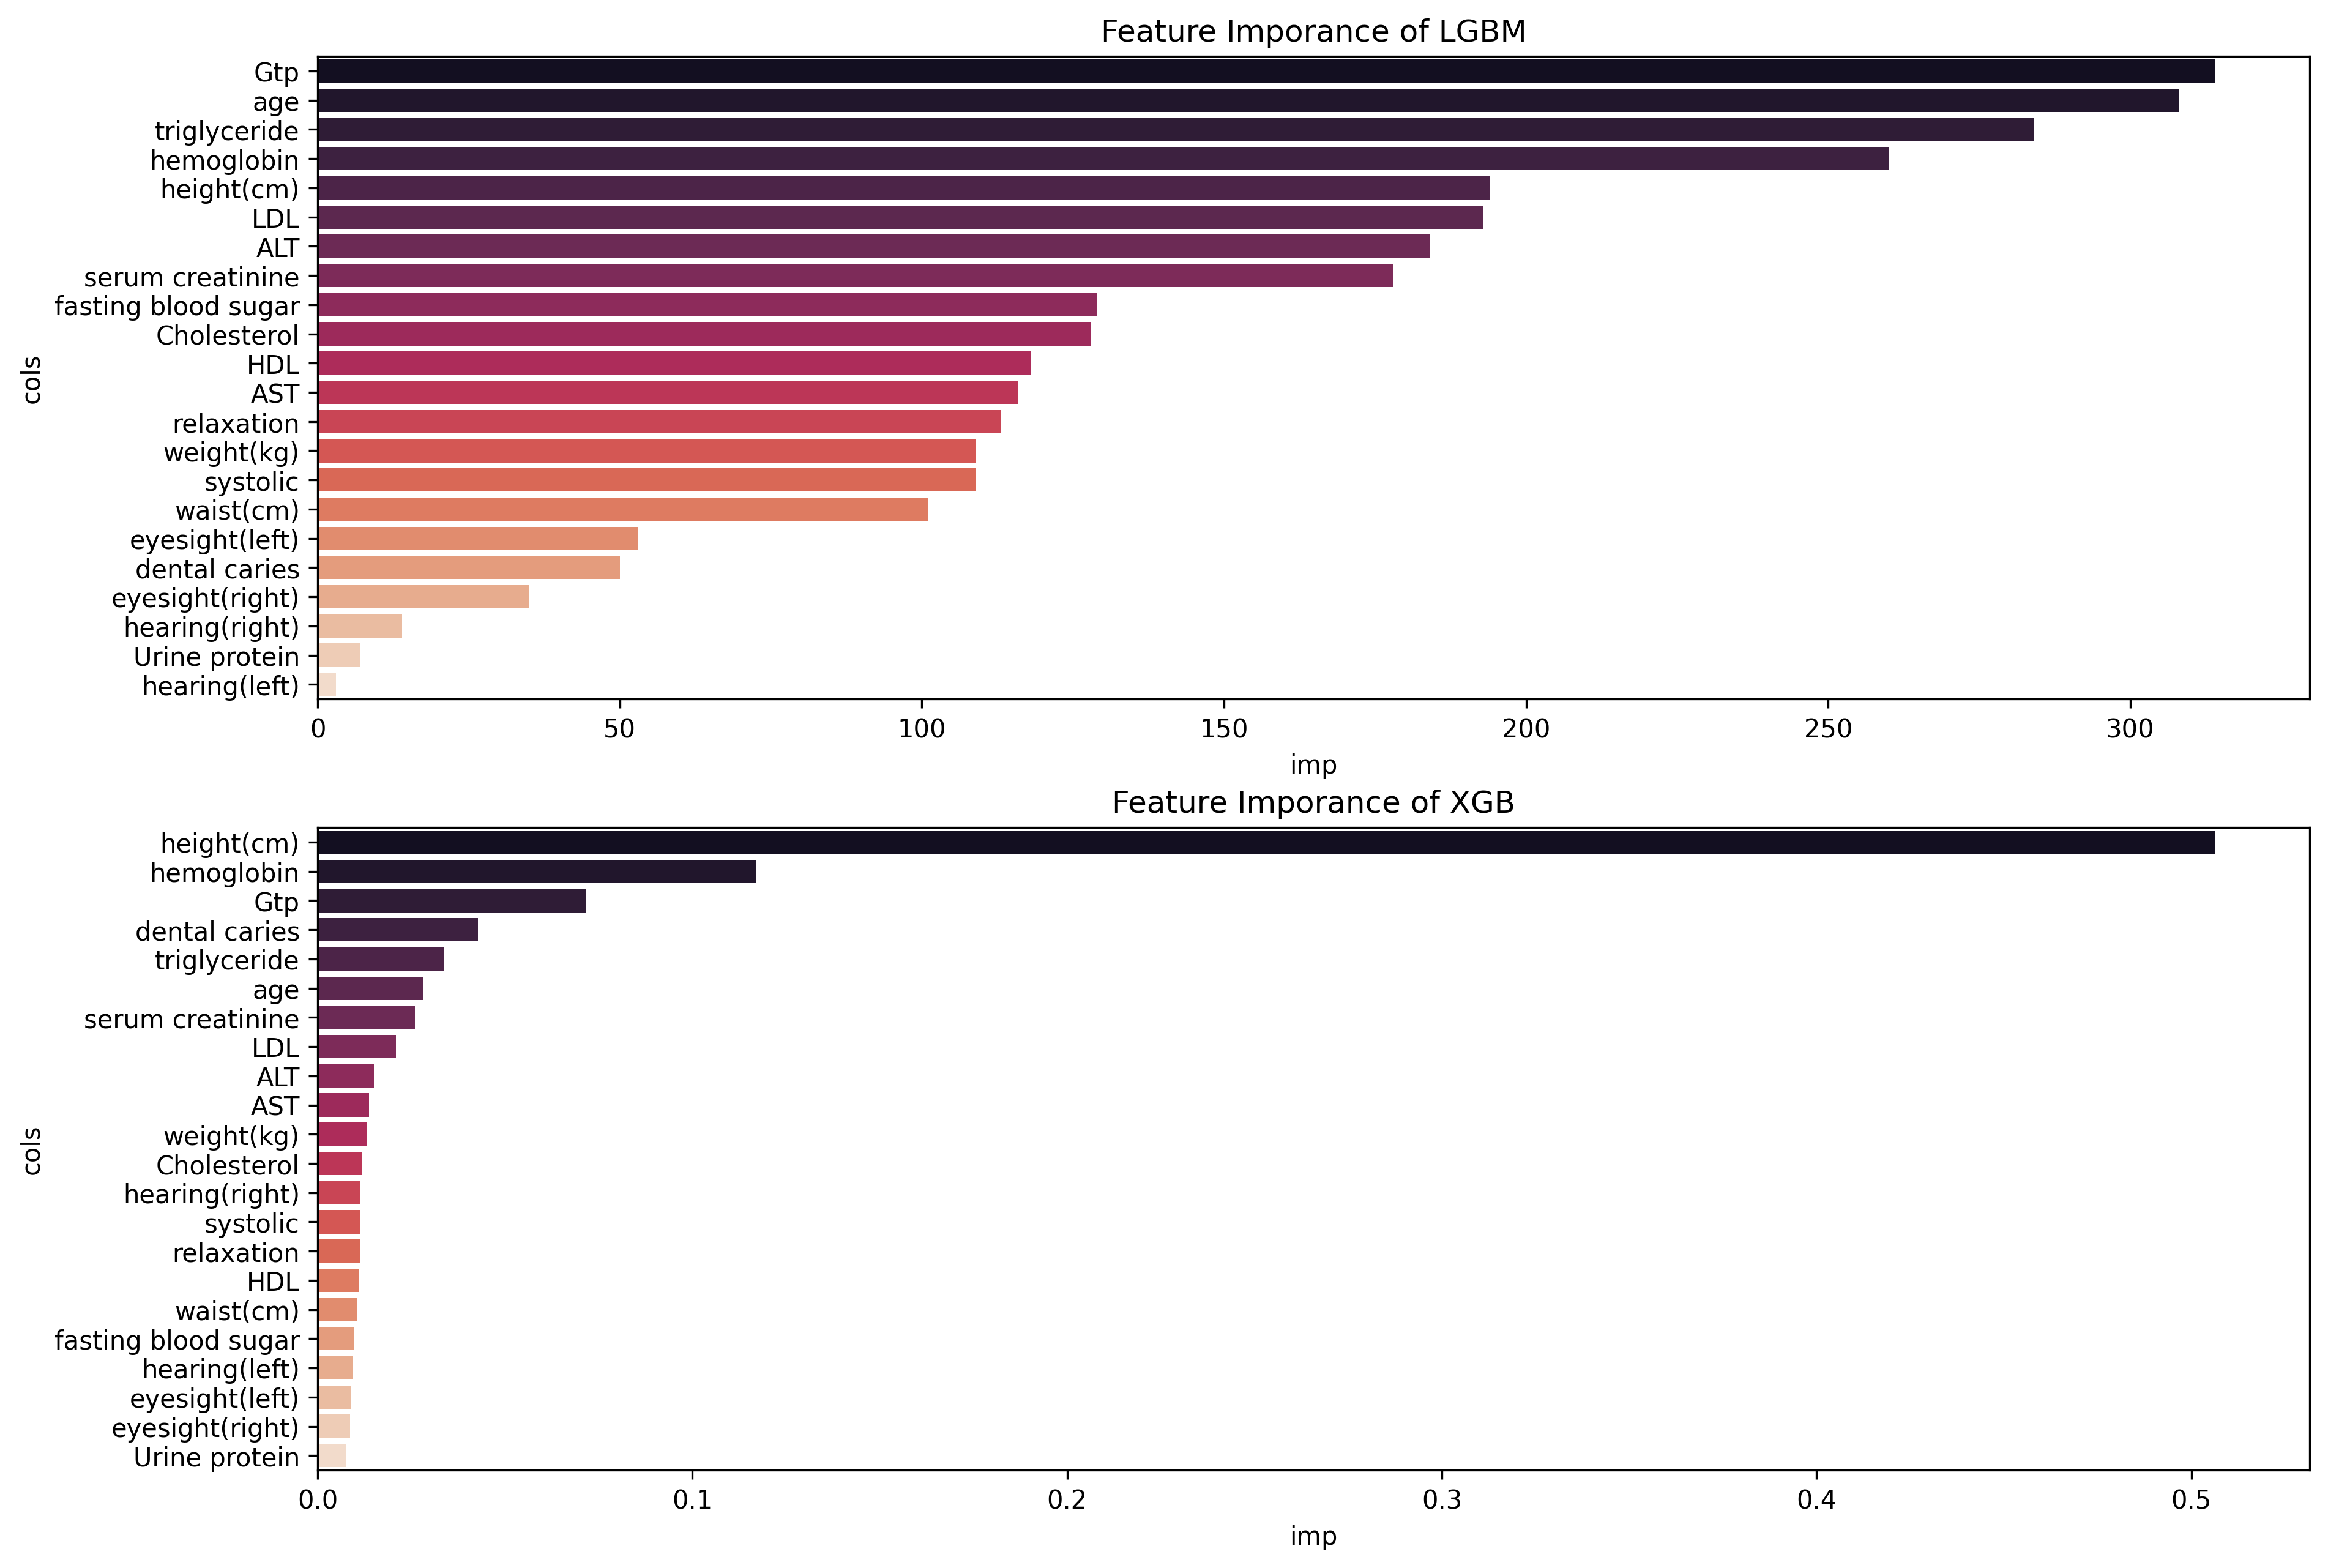

In [46]:
plotImportance(["LGBM","XGB"],[lgbmmodel,xgbmodel])

<div id="7" style="background-color: #DDDDDD; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   Creating 'submission.csv'
    </h1>
</div>

In [47]:
submission = pd.DataFrame()
submission["id"] = test_data.index

In [48]:
submission["smoking"] = lgbmmodel.predict_proba(test_data)[:,1] + xgbmodel.predict_proba(test_data)[:,1]
submission["smoking"] = submission["smoking"]/2
submission.head(10)

,id,smoking
0,159256,0.604247
1,159257,0.172755
2,159258,0.419638
3,159259,0.019395
4,159260,0.569116
5,159261,0.927251
6,159262,0.502604
7,159263,0.040933
8,159264,0.144833
9,159265,0.046831


In [49]:
submission[["id","smoking"]].to_csv("submission.csv",header=True,index=False)